# Merge Projects Peyser and Misharin

In [1]:
import scanpy as sc
import os
import gzip
import shutil
from tqdm.notebook import tqdm
import anndata
import matplotlib.pyplot as plt
import helpers_danielstrobel
from IPython.display import Image
import numpy as np
import seaborn as sns
from scipy.stats import median_abs_deviation
import anndata2ri
import logging
import scrublet
import pandas as pd

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)
plt.rcParams['figure.figsize'] = (9, 9)

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/rpy2/robjects/conversion.py:28: DeprecationWarning: The use of converter in module rpy2.robjects.conversion is deprecated. Use rpy2.robjects.conversion.get_conversion() instead o

In [2]:
adata_peyser = sc.read("data/adata_annotated_lea.h5ad")
adata_misharin = sc.read("data/misharin_Emma_processed_annotated.h5ad")

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/uns' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/uns/dea_louvain_0_5_filtered' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/uns/dea_louvain_0_5_filtered/names' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))


In [3]:
adata_peyser.obs

,samples,GSM,condition,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,...,outlier,mt_outlier,n_genes,n_counts,doublet_score,predicted_doublet,is_doublet,louvain,annotation_coarse,annotation_coarse_precise
AAACCTGAGGAATTAC-1,GSM3716976_saline.947170,GSM3716976,saline,947170,1158,7.055313,2729.0,7.912057,22.792232,0.0,...,False,False,1158,1657.952515,0.007582,False,False,0,Macrophages,Interstitial \n Macrophages
AAACCTGCATAACCTG-1,GSM3716976_saline.947170,GSM3716976,saline,947170,1526,7.331060,6030.0,8.704668,23.598673,0.0,...,False,False,1526,1552.569580,0.010634,False,False,5,B-Cells,B-Cells
AAACCTGCATTGGGCC-1,GSM3716976_saline.947170,GSM3716976,saline,947170,2115,7.657283,5689.0,8.646465,19.968360,0.0,...,False,False,2115,2086.439697,0.003242,False,False,8,Mesothelial,Mesothelial
AAACCTGGTCTCAACA-1,GSM3716976_saline.947170,GSM3716976,saline,947170,2395,7.781556,8031.0,8.991189,28.066243,0.0,...,False,False,2395,2038.384766,0.004266,False,False,4,Macrophages 2,Avolare \nMacrophages
AAACCTGGTTGACGTT-1,GSM3716976_saline.947170,GSM3716976,saline,947170,1154,7.051856,2060.0,7.630947,18.203883,0.0,...,False,False,1154,1799.102539,0.005743,False,False,1,Endothelial,Endothelial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCCAGACAAGC-1,GSM3716985_nintedanib.947178,GSM3716985,nintedanib,947178,2766,7.925519,13438.0,9.505917,35.280548,0.0,...,False,False,2766,1828.999146,0.012512,False,False,4,Macrophages 2,Avolare \nMacrophages
TTTGCGCGTCATATGC-1,GSM3716985_nintedanib.947178,GSM3716985,nintedanib,947178,1273,7.149917,3268.0,8.092239,30.293758,0.0,...,False,False,1273,1670.374634,0.010634,False,False,4,Macrophages 2,Avolare \nMacrophages
TTTGCGCGTCCGAATT-1,GSM3716985_nintedanib.947178,GSM3716985,nintedanib,947178,1472,7.295056,4342.0,8.376321,19.345924,0.0,...,False,False,1472,1757.693481,0.003576,False,False,10,Monocytes 2,Monocytes 2
TTTGGTTGTAGCTTGT-1,GSM3716985_nintedanib.947178,GSM3716985,nintedanib,947178,1673,7.422971,5851.0,8.674539,20.133311,0.0,...,False,False,1673,1703.329590,0.007368,False,False,5,B-Cells,B-Cells


In [4]:
adata_misharin.obs

,batch,cond,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,...,pct_counts_hb,outlier,n_counts,n_genes,leiden_1,leiden_2,leiden_0_4,leiden_0_3,louvain,manual_celltype_annotation
SC14_AAACCTGAGCGTTCCG,0,control,749,6.620073,1855.0,7.526179,25.606469,0.0,0.0,0.0,...,0.0,False,1855.0,749,3,5,4,4,4,B-Cells
SC14_AAACCTGAGGACATTA,0,control,629,6.445720,1479.0,7.299798,26.369168,0.0,0.0,0.0,...,0.0,False,1479.0,629,3,5,4,4,4,B-Cells
SC14_AAACCTGAGTCGTTTG,0,control,1180,7.074117,2638.0,7.878155,20.507961,0.0,0.0,0.0,...,0.0,False,2638.0,1180,2,4,2,2,2,Alveolar macrophages
SC14_AAACCTGCACATCCGG,0,control,2498,7.823646,9452.0,9.154087,16.314008,0.0,0.0,0.0,...,0.0,False,9452.0,2498,1,1,1,1,1,Classical monocyte
SC14_AAACCTGCACTAGTAC,0,control,1139,7.038784,3883.0,8.264621,24.671646,0.0,0.0,0.0,...,0.0,False,3883.0,1139,5,3,3,3,3,T-Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC15_TTTGTCAGTGATGTGG,1,fibrosis,1141,7.040536,2724.0,7.910223,21.145374,0.0,0.0,0.0,...,0.0,False,2724.0,1141,12,14,10,1,5,Monocytes
SC15_TTTGTCAGTTCGCTAA,1,fibrosis,793,6.677083,2193.0,7.693481,26.265390,0.0,0.0,0.0,...,0.0,False,2193.0,793,5,3,3,3,3,T-Cells
SC15_TTTGTCATCAGTCAGT,1,fibrosis,1638,7.401842,4270.0,8.359603,18.056206,0.0,0.0,0.0,...,0.0,False,4270.0,1638,1,1,1,1,1,Classical monocyte
SC15_TTTGTCATCGCGTAGC,1,fibrosis,1803,7.497762,7743.0,8.954674,26.217228,0.0,0.0,0.0,...,0.0,False,7743.0,1803,27,33,17,15,16,CCR7 dendridic


In [5]:
# nur spalten mit gleichem Namen werden mitgenommen
adata_peyser.obs["annotation"] = adata_peyser.obs["annotation_coarse_precise"]
adata_misharin.obs["annotation"] = adata_misharin.obs["manual_celltype_annotation"]

In [6]:
adata_projects = {}
# hier alle Projekte einfügen
adata_projects["Peyser"] = adata_peyser
adata_projects["Misharin"] = adata_misharin
adata = anndata.concat(adata_projects, label="projects")
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,outlier,n_genes,n_counts,louvain,annotation,projects
AAACCTGAGGAATTAC-1,1158,7.055313,2729.0,7.912057,22.792232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1158,1657.952515,0,Interstitial \n Macrophages,Peyser
AAACCTGCATAACCTG-1,1526,7.331060,6030.0,8.704668,23.598673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1526,1552.569580,5,B-Cells,Peyser
AAACCTGCATTGGGCC-1,2115,7.657283,5689.0,8.646465,19.968360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,2115,2086.439697,8,Mesothelial,Peyser
AAACCTGGTCTCAACA-1,2395,7.781556,8031.0,8.991189,28.066243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,2395,2038.384766,4,Avolare \nMacrophages,Peyser
AAACCTGGTTGACGTT-1,1154,7.051856,2060.0,7.630947,18.203883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1154,1799.102539,1,Endothelial,Peyser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC15_TTTGTCAGTGATGTGG,1141,7.040536,2724.0,7.910223,21.145374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1141,2724.000000,5,Monocytes,Misharin
SC15_TTTGTCAGTTCGCTAA,793,6.677083,2193.0,7.693481,26.265390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,793,2193.000000,3,T-Cells,Misharin
SC15_TTTGTCATCAGTCAGT,1638,7.401842,4270.0,8.359603,18.056206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1638,4270.000000,1,Classical monocyte,Misharin
SC15_TTTGTCATCGCGTAGC,1803,7.497762,7743.0,8.954674,26.217228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1803,7743.000000,16,CCR7 dendridic,Misharin


In [7]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


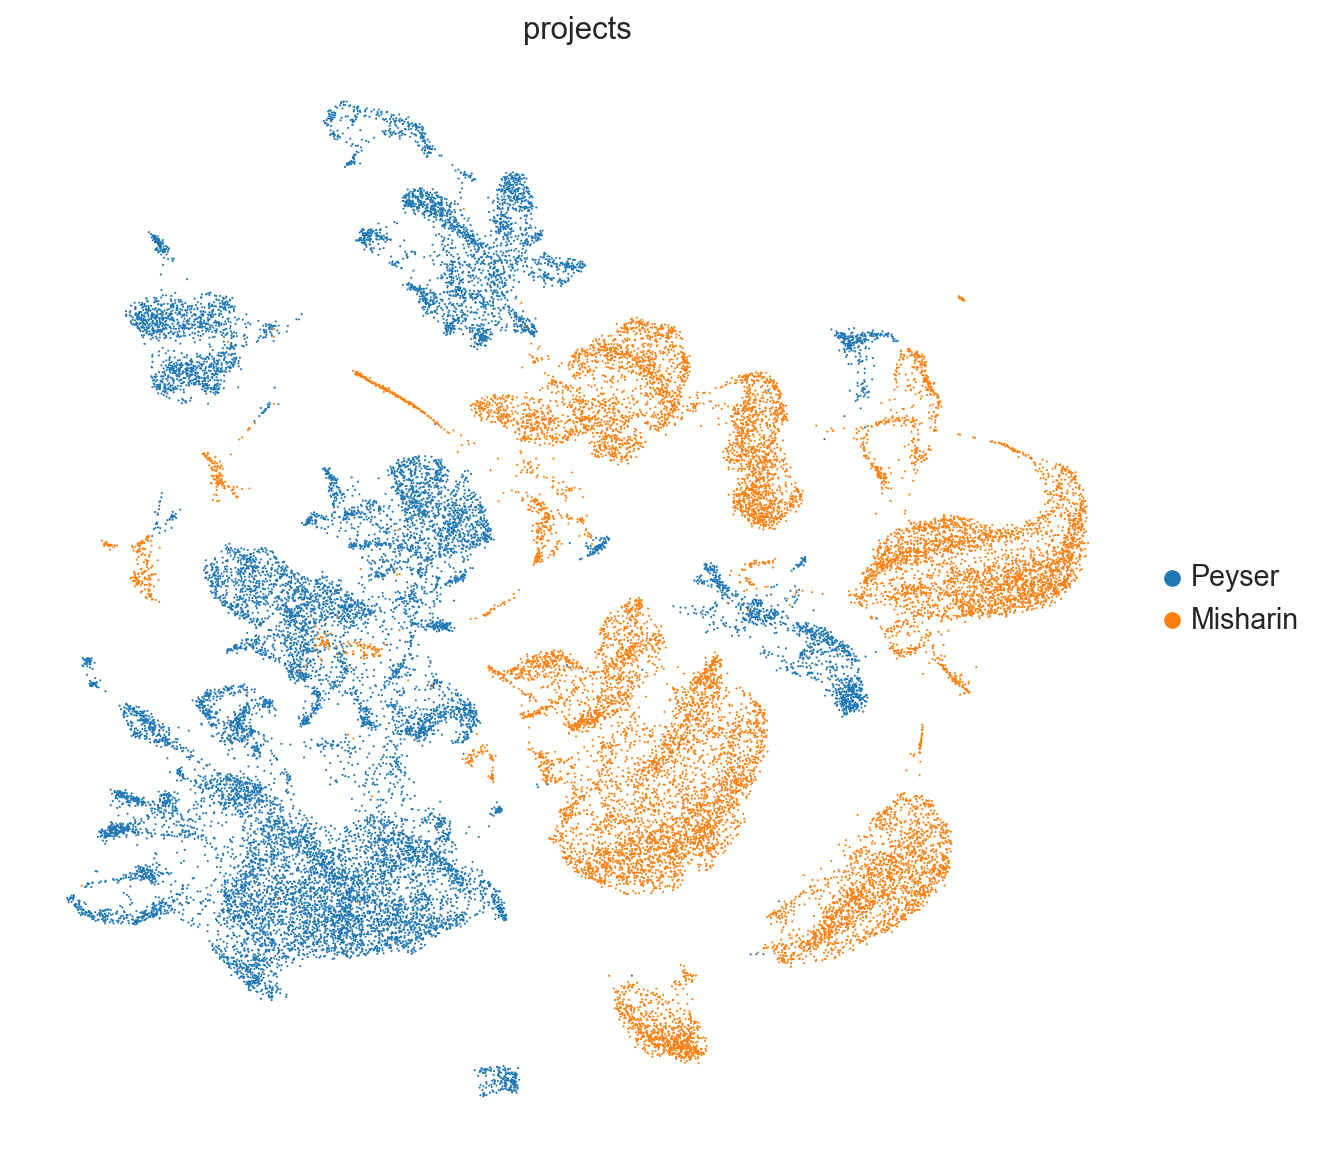

In [8]:
sc.pl.umap(adata=adata, color=["projects"])

/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/leahollenberg/Desktop/Masterpraktikum/PycharmProjects/scanpy_start/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


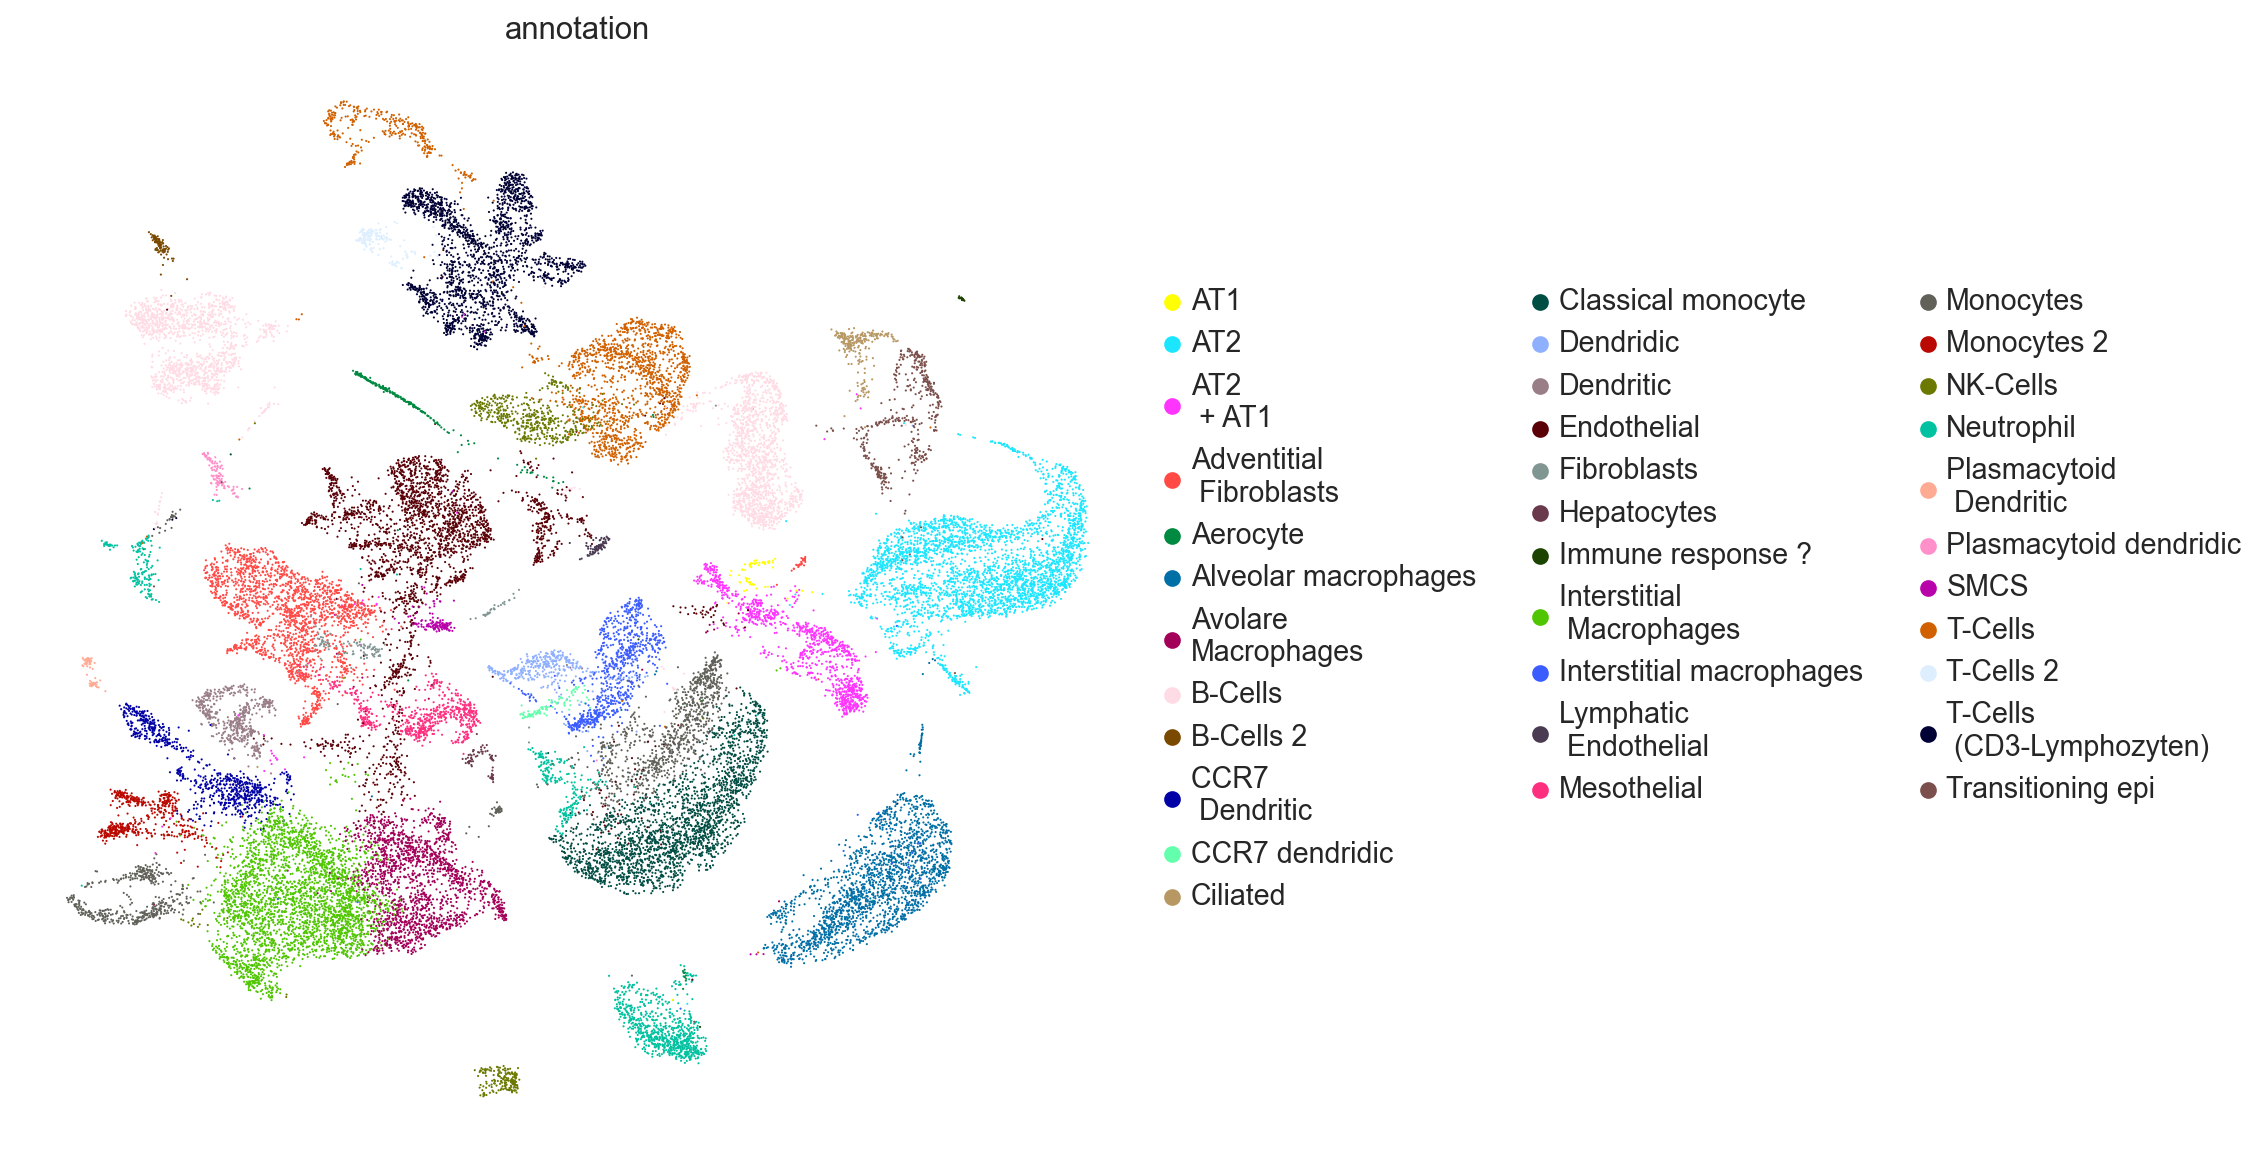

In [9]:
sc.pl.umap(adata=adata, color=["annotation"])